# Fit some data to functions

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [19]:
# Polinomila function
def polynomial_func(x, y, degree):
    Polynomial = np.polynomial.Polynomial
    xmin, xmax = min(x), max(x)
    pfit, stats = Polynomial.fit(x, y, degree, full=True,
                                 window=(xmin, xmax),
                                 domain=(xmin, xmax))
    return pfit, stats
# exponential
def exp_func(x, a, k, b):
    return a * np.exp(-k*x) + b
#logarithmic
def log_func(x, a, b, c):
    return a * np.log10(x + b) + c
#Natural logarithmic
def ln_func(x, a, b, c): 
    return a * np.log(x + b) + c

## Exponential function

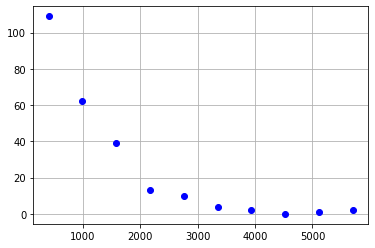

In [45]:
x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])
plt.plot(x, y, 'o', color='blue')
plt.grid()

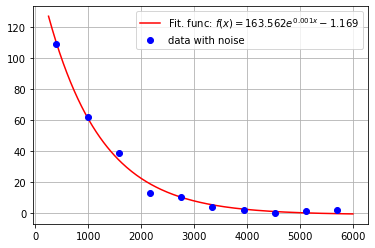

In [46]:
# curve fit
p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(exp_func, x, y, p0)
a, k, b = opt
# test result
x2 = np.linspace(250, 6000, 250)
y2 = exp_func(x2, a, k, b)
fig, ax = plt.subplots()
ax.plot(x2, y2, color='r', label='Fit. func: $f(x) = %.3f e^{%.3f x} %+.3f$' % (a,k,b))
ax.plot(x, y, 'bo', label='data with noise')
ax.legend(loc='best')
plt.grid()

## Logarithmic function

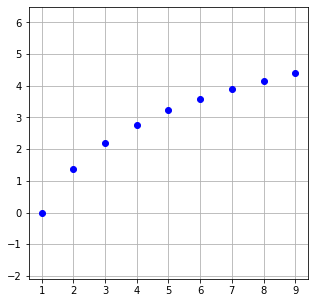

In [50]:
x = (1, 2, 3, 4, 5, 6, 7, 8, 9)
y = (0, 1.386, 2.197, 2.773, 3.219, 3.584, 3.892, 4.159, 4.394)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.axis('equal')
plt.plot(x, y, 'o', color='blue')
plt.grid()

<ipython-input-49-a007f710de96>:9: RuntimeWarning: invalid value encountered in log
  return a * np.log(x + b) + c


Parameters: [ 1.99994503e+00 -1.67657822e-04  2.21932130e-04]
RMSE: 0.0002904930555381104
R-squared: 0.9999999864864941



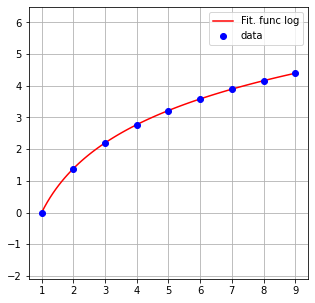

In [54]:
# these are the same as the scipy defaults
initialParameters = np.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(ln_func, x, y, initialParameters)

yhat = ln_func(x, *fittedParameters) 

abs_error = np.absolute(yhat - y)
SE = np.square(abs_error) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(abs_error) / np.var(y))

# test result
x2 = np.linspace(1, 9, 90)
y2hat = ln_func(x2, *fittedParameters)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.axis('equal')
ax.plot(x2, y2hat, color='r', label='Fit. func log')
plt.plot(x, y, 'o', color='blue', label='data')
ax.legend(loc='best')
plt.grid()

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
print()

## Datos que ajusto con una función polinomial y con una exponencial

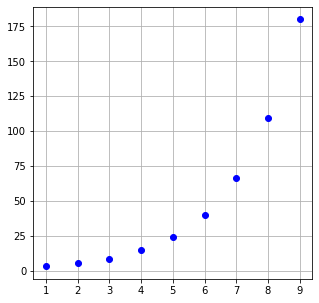

In [10]:
x = np.array((1, 2, 3, 4, 5, 6, 7, 8, 9), dtype=np.float64)
y = np.array((3.297, 5.437, 8.963, 14.778, 24.365, 40.172, 66.231,
              109.196, 180.034), dtype=np.float64)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x, y, 'o', color='blue')
plt.grid()

Fitted parameters: poly([ 7.2925     -7.76897747  4.77585402 -0.89385878  0.07730973])
resids [1.17319018]
rank 5
sing_val [2.1162771  0.69654203 0.18778547 0.030488   0.00274135]
rcond 1.9984014443252818e-15
rms residual = 0.3610)


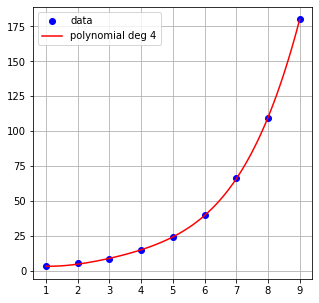

In [28]:
# Polinomial function
degree = 4
pfit, stats = polynomial_func(x, y, degree)

print('Fitted parameters:', pfit)
# resid, rank, sing_val, rcond = stats
# print('resids', resid)
# print('rank', rank)
# print('sing_val', sing_val)
# print('rcond', rcond)

yhat = pfit(x) 
errors = np.absolute(yhat - y)
MSE = np.mean(errors) # Root Mean Squared Error, RMSE
SE = np.square(errors) # squared errors
MSE = np.mean(SE) # mean squared errors
Rsquared = 1.0 - (np.var(abs_error) / np.var(y))

# graph
x2 = np.linspace(1, 9, 90)
y2 = pfit(x2)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(x, y, 'o', color='blue', label='data')
plt.plot(x2, y2, color='red', label=f'polynomial deg {degree}')
ax.legend(loc='best')
plt.grid()
